In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_sales = pd.read_excel('dat/salesworkload.xlsx',
                         sheet_name = 0,
                         header = 1,
                         na_values = ['#NV', 'Err:520'])

df_hours = pd.read_excel('dat/salesworkload.xlsx',
                         sheet_name = 1,
                         header = 5,
                         na_values = ['#NV', 'Err:520'])

In [3]:
df_sales

,MonthYear,Time index,Country,StoreID,City,Dept_ID,Dept. Name,HoursOwn,HoursLease,Sales units,Turnover,Customer,Area (m2),Opening hours
0,10.2016,1.0,United Kingdom,88253.0,London (I),1.0,Dry,3184.76,0.0,398560.0,1226244.0,NaN,953.04,Type A
1,10.2016,1.0,United Kingdom,88253.0,London (I),2.0,Frozen,1582.94,0.0,82725.0,387810.0,NaN,720.48,Type A
2,10.2016,1.0,United Kingdom,88253.0,London (I),3.0,other,47.205,0.0,438400.0,654657.0,NaN,966.72,Type A
3,10.2016,1.0,United Kingdom,88253.0,London (I),4.0,Fish,1623.85,0.0,309425.0,499434.0,NaN,1053.36,Type A
4,10.2016,1.0,United Kingdom,88253.0,London (I),5.0,Fruits & Vegetables,1759.17,0.0,165515.0,329397.0,NaN,1053.36,Type A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7653,06.2017,9.0,Sweden,29650.0,Gothenburg,12.0,Checkout,6322.32,0.0,3886530.0,14538825.0,NaN,NaN,Type A
7654,06.2017,9.0,Sweden,29650.0,Gothenburg,16.0,Customer Services,4270.48,0.0,245.0,0.0,NaN,NaN,Type A
7655,06.2017,9.0,Sweden,29650.0,Gothenburg,11.0,Delivery,0,0.0,0.0,0.0,NaN,NaN,Type A
7656,06.2017,9.0,Sweden,29650.0,Gothenburg,17.0,others,2224.93,0.0,245.0,0.0,NaN,NaN,Type A


In [4]:
df_sales.dtypes

MonthYear         object
Time index       float64
Country           object
StoreID          float64
City              object
Dept_ID          float64
Dept. Name        object
HoursOwn          object
HoursLease       float64
Sales units      float64
Turnover         float64
Customer         float64
Area (m2)        float64
Opening hours     object
dtype: object

In [5]:
df_sales.describe(include = 'all')

,MonthYear,Time index,Country,StoreID,City,Dept_ID,Dept. Name,HoursOwn,HoursLease,Sales units,Turnover,Customer,Area (m2),Opening hours
count,7658,7650.000000,7650,7650.000000,7650,7650.000000,7650,7650.000,7650.000000,7.650000e+03,7.650000e+03,0.0,6800.000000,7650
unique,10,NaN,11,NaN,50,NaN,17,3505.000,NaN,NaN,NaN,NaN,NaN,3
top,11.2016,NaN,United Kingdom,NaN,Bilbao,NaN,Customer Services,47.205,NaN,NaN,NaN,NaN,NaN,Type A
freq,850,NaN,918,NaN,153,NaN,450,450.000,NaN,NaN,NaN,NaN,NaN,5661
mean,NaN,5.000000,NaN,61995.220000,NaN,9.470588,NaN,NaN,22.036078,1.076471e+06,3.721393e+06,NaN,7557.276935,NaN
std,NaN,2.582158,NaN,29924.581631,NaN,5.337429,NaN,NaN,133.299513,1.728113e+06,6.003380e+06,NaN,10727.610965,NaN
min,NaN,1.000000,NaN,12227.000000,NaN,1.000000,NaN,NaN,0.000000,0.000000e+00,0.000000e+00,NaN,0.000000,NaN
25%,NaN,3.000000,NaN,29650.000000,NaN,5.000000,NaN,NaN,0.000000,5.457125e+04,2.726798e+05,NaN,563.160000,NaN
50%,NaN,5.000000,NaN,75400.500000,NaN,9.000000,NaN,NaN,0.000000,2.932300e+05,9.319575e+05,NaN,1212.960000,NaN
75%,NaN,7.000000,NaN,87703.000000,NaN,14.000000,NaN,NaN,0.000000,9.175075e+05,3.264432e+06,NaN,11199.360000,NaN


In [6]:
df_sales[df_sales['Area (m2)'].isnull()]

,MonthYear,Time index,Country,StoreID,City,Dept_ID,Dept. Name,HoursOwn,HoursLease,Sales units,Turnover,Customer,Area (m2),Opening hours
850,- - - -,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1701,- - - -,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2552,- - - -,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3403,- - - -,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4254,- - - -,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7653,06.2017,9.0,Sweden,29650.0,Gothenburg,12.0,Checkout,6322.32,0.0,3886530.0,14538825.0,NaN,NaN,Type A
7654,06.2017,9.0,Sweden,29650.0,Gothenburg,16.0,Customer Services,4270.48,0.0,245.0,0.0,NaN,NaN,Type A
7655,06.2017,9.0,Sweden,29650.0,Gothenburg,11.0,Delivery,0,0.0,0.0,0.0,NaN,NaN,Type A
7656,06.2017,9.0,Sweden,29650.0,Gothenburg,17.0,others,2224.93,0.0,245.0,0.0,NaN,NaN,Type A


In [7]:
df_sales = df_sales.drop(['MonthYear', 'City', 'Dept_ID', 'Customer'], axis = 1)

In [8]:
df_sales = df_sales.dropna()

In [9]:
df_sales

,Time index,Country,StoreID,Dept. Name,HoursOwn,HoursLease,Sales units,Turnover,Area (m2),Opening hours
0,1.0,United Kingdom,88253.0,Dry,3184.76,0.0,398560.0,1226244.0,953.04,Type A
1,1.0,United Kingdom,88253.0,Frozen,1582.94,0.0,82725.0,387810.0,720.48,Type A
2,1.0,United Kingdom,88253.0,other,47.205,0.0,438400.0,654657.0,966.72,Type A
3,1.0,United Kingdom,88253.0,Fish,1623.85,0.0,309425.0,499434.0,1053.36,Type A
4,1.0,United Kingdom,88253.0,Fruits & Vegetables,1759.17,0.0,165515.0,329397.0,1053.36,Type A
...,...,...,...,...,...,...,...,...,...,...
6802,8.0,Sweden,29650.0,Checkout,6668.49,0.0,3793520.0,14025312.0,31308.96,Type A
6803,8.0,Sweden,29650.0,Customer Services,4506.5,0.0,245.0,0.0,0.00,Type A
6804,8.0,Sweden,29650.0,Delivery,0,0.0,0.0,0.0,0.00,Type A
6805,8.0,Sweden,29650.0,others,2640.33,0.0,245.0,0.0,0.00,Type A


In [10]:
df_sales[df_sales['HoursOwn'] == '?']

,Time index,Country,StoreID,Dept. Name,HoursOwn,HoursLease,Sales units,Turnover,Area (m2),Opening hours
2966,4.0,Spain,16927.0,Meat,?,0.0,1799675.0,5557959.0,8408.64,Type A
5889,7.0,Belgium,73762.0,Frozen,?,0.0,189930.0,1335069.0,627.00,Type A


In [11]:
imp_dept_meat = df_sales.loc[(df_sales['Dept. Name'] == 'Meat') & (df_sales['HoursOwn'] != '?')]['HoursOwn'].mean()
imp_dept_frozen = df_sales.loc[(df_sales['Dept. Name'] == 'Frozen') & (df_sales['HoursOwn'] != '?')]['HoursOwn'].mean()

In [12]:
df_sales.loc[(df_sales['Dept. Name'] == 'Meat') & (df_sales['HoursOwn'] == '?'), 'HoursOwn'] = imp_dept_meat
df_sales.loc[(df_sales['Dept. Name'] == 'Frozen') & (df_sales['HoursOwn'] == '?'), 'HoursOwn'] = imp_dept_frozen

In [13]:
df_sales.dtypes

Time index       float64
Country           object
StoreID          float64
Dept. Name        object
HoursOwn          object
HoursLease       float64
Sales units      float64
Turnover         float64
Area (m2)        float64
Opening hours     object
dtype: object

In [14]:
df_sales['HoursOwn'] = pd.to_numeric(df_sales['HoursOwn'])
df_sales.dtypes

Time index       float64
Country           object
StoreID          float64
Dept. Name        object
HoursOwn         float64
HoursLease       float64
Sales units      float64
Turnover         float64
Area (m2)        float64
Opening hours     object
dtype: object

In [15]:
df_sales = df_sales.astype({'Time index': 'int64',
                            'StoreID': 'int64',
                            'Sales units': 'int64',
                            'Turnover': 'int64'})

In [16]:
df_sales['HoursTotal'] = df_sales['HoursOwn'] + df_sales['HoursLease']
df_sales.drop(columns = ['HoursOwn', 'HoursLease'], inplace = True)

In [17]:
df_sales

,Time index,Country,StoreID,Dept. Name,Sales units,Turnover,Area (m2),Opening hours,HoursTotal
0,1,United Kingdom,88253,Dry,398560,1226244,953.04,Type A,3184.764
1,1,United Kingdom,88253,Frozen,82725,387810,720.48,Type A,1582.941
2,1,United Kingdom,88253,other,438400,654657,966.72,Type A,47.205
3,1,United Kingdom,88253,Fish,309425,499434,1053.36,Type A,1623.852
4,1,United Kingdom,88253,Fruits & Vegetables,165515,329397,1053.36,Type A,1759.173
...,...,...,...,...,...,...,...,...,...
6802,8,Sweden,29650,Checkout,3793520,14025312,31308.96,Type A,6668.493
6803,8,Sweden,29650,Customer Services,245,0,0.00,Type A,4506.504
6804,8,Sweden,29650,Delivery,0,0,0.00,Type A,0.000
6805,8,Sweden,29650,others,245,0,0.00,Type A,2640.333


In [18]:
df_sales.describe(include = 'all')

,Time index,Country,StoreID,Dept. Name,Sales units,Turnover,Area (m2),Opening hours,HoursTotal
count,6800.000000,6800,6800.000000,6800,6.800000e+03,6.800000e+03,6800.000000,6800,6800.000000
unique,NaN,11,NaN,17,NaN,NaN,NaN,3,NaN
top,NaN,United Kingdom,NaN,Customer Services,NaN,NaN,NaN,Type A,NaN
freq,NaN,816,NaN,400,NaN,NaN,NaN,5032,NaN
mean,4.500000,NaN,61995.220000,NaN,1.087051e+06,3.729094e+06,7557.276935,NaN,7887.608815
std,2.291456,NaN,29924.826148,NaN,1.747606e+06,6.024040e+06,10727.610965,NaN,12565.178379
min,1.000000,NaN,12227.000000,NaN,0.000000e+00,0.000000e+00,0.000000,NaN,0.000000
25%,2.750000,NaN,29650.000000,NaN,5.450000e+04,2.661300e+05,563.160000,NaN,2006.999250
50%,4.500000,NaN,75400.500000,NaN,2.948550e+05,9.350475e+05,1212.960000,NaN,3587.580000
75%,6.250000,NaN,87703.000000,NaN,9.245238e+05,3.279810e+06,11199.360000,NaN,7628.328000


In [19]:
df_hours.drop(columns = ['Store name', 'Region', ])

,id,Scheme,10,11,12,1,2,3,4,5,...,12.1,1.1,2.1,3.1,4.1,5.1,6.1,7.1,8.1,9.1
0,88253,Type A,382,367,350,382,352,380,352,367,...,1099,1481,1833,2213,2565,2932,3267,3664,4059,4426
1,38976,Type A,382,367,350,382,352,380,352,367,...,1099,1481,1833,2213,2565,2932,3267,3664,4059,4426
2,17647,Type A,382,367,350,382,352,380,352,367,...,1099,1481,1833,2213,2565,2932,3267,3664,4059,4426
3,22117,Type A,382,367,350,382,352,380,352,367,...,1099,1481,1833,2213,2565,2932,3267,3664,4059,4426
4,73949,Type B,342,342,313,342,314,341,314,328,...,997,1339,1653,1994,2308,2636,2935,3291,3646,3974
5,18808,Type B,342,342,313,342,314,341,314,328,...,997,1339,1653,1994,2308,2636,2935,3291,3646,3974
6,71991,Type A,382,367,350,382,352,380,352,367,...,1099,1481,1833,2213,2565,2932,3267,3664,4059,4426
7,86208,Type B,354,354,325,354,326,353,326,340,...,1033,1387,1713,2066,2392,2732,3043,3411,3778,4118
8,23623,Type A,382,367,350,382,352,380,352,367,...,1099,1481,1833,2213,2565,2932,3267,3664,4059,4426
9,19769,Type A,382,367,350,382,352,380,352,367,...,1099,1481,1833,2213,2565,2932,3267,3664,4059,4426


In [22]:
df_sales['ID'] = df_sales['StoreID'].map(str) + df_sales['Dept. Name'].map(str)

In [32]:
df_cumul = df_sales[['ID', 'StoreID', 'HoursTotal', 'Sales units']].groupby(['ID', 'StoreID'], as_index = False).sum()

In [ ]:
df_sales['ID'] = df_sales['StoreID'].map(str) + df_sales['Dept. Name'].map(str)
df_cumul = df_sales[['ID', 'StoreID', 'HoursTotal', 'Sales units']].groupby(['ID', 'StoreID'], as_index = False).sum()
df_cumul 

In [33]:
df_cumul

,ID,StoreID,HoursTotal,Sales units
0,12227Admin,12227,31913.727,1320
1,12227Checkout,12227,76629.450,47398365
2,12227Clothing,12227,63871.512,2440295
3,12227Customer Services,12227,31233.975,1320
4,12227Delivery,12227,0.000,715
...,...,...,...,...
845,98422Meat,98422,65577.186,12260905
846,98422Non Food,98422,78467.298,3007105
847,98422all,98422,386879.592,28814765
848,98422other,98422,377.640,4001885


In [31]:
df_hours = df_hours[['id', '5.1']]
df_hours

,id,5.1
0,88253,2932
1,38976,2932
2,17647,2932
3,22117,2932
4,73949,2636
5,18808,2636
6,71991,2932
7,86208,2732
8,23623,2932
9,19769,2932


In [36]:
df = pd.merge(df_cumul, df_hours, left_on = 'StoreID', right_on = 'id', how = 'left')
df['Ratio'] = df['HoursTotal'] / df['5.1']
df

,ID,StoreID,HoursTotal,Sales units,id,5.1,Ratio
0,12227Admin,12227,31913.727,1320,12227,2932,10.884627
1,12227Checkout,12227,76629.450,47398365,12227,2932,26.135556
2,12227Clothing,12227,63871.512,2440295,12227,2932,21.784281
3,12227Customer Services,12227,31233.975,1320,12227,2932,10.652788
4,12227Delivery,12227,0.000,715,12227,2932,0.000000
...,...,...,...,...,...,...,...
845,98422Meat,98422,65577.186,12260905,98422,2732,24.003362
846,98422Non Food,98422,78467.298,3007105,98422,2732,28.721559
847,98422all,98422,386879.592,28814765,98422,2732,141.610392
848,98422other,98422,377.640,4001885,98422,2732,0.138228


In [37]:
%matplotlib inline

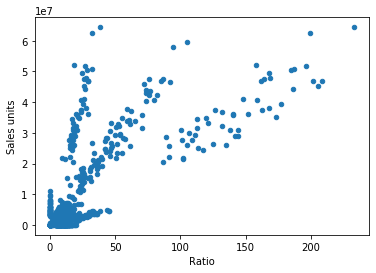

In [38]:
df.plot.scatter(x = 'Ratio', y = 'Sales units')

In [42]:
df_meat = df[df['ID'].str.contains('Meat')]

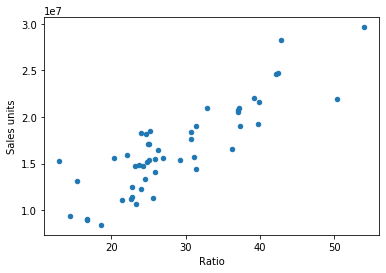

In [75]:
df_meat.plot.scatter(x = 'Ratio', y = 'Sales units')

In [47]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [44]:
reg = linear_model.LinearRegression()

In [53]:
X = df_meat['Ratio']
y = df_meat['Sales units']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [70]:
np.array(X_train)

array([25.10589356, 39.13678752, 20.35138711, 12.99693827, 42.84084516,
       31.1798934 , 25.53193814, 42.19792121, 32.85459413, 37.27778206,
       24.68548874, 15.35611494, 25.25370759, 26.92458931, 23.12057538,
       18.63434078, 23.65187312, 14.44271214, 24.97168016, 25.91230355,
       30.67538745, 39.89348431, 25.02573397, 16.68382265, 37.14208356,
       22.74570532, 24.00336237, 36.28252118, 22.11855218, 22.56542826,
       50.42176637, 24.50444034, 24.77564836])

In [72]:
reg.fit(np.array(X_train).reshape(-1, 1), np.array(y_train))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [73]:
reg.coef_

array([417168.25575446])

In [74]:
reg.intercept_

4765710.142315516

In [76]:
reg2 = linear_model.LinearRegression()

In [77]:
reg2.coef_

AttributeError: 'LinearRegression' object has no attribute 'coef_'